In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from sklearn.feature_selection import RFECV

In [2]:
data = pd.read_csv("../../framingham_heart_study.csv")

In [3]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
data.shape

(4240, 16)

In [7]:
pd.isnull(data).values.any()

True

In [8]:
pd.isnull(data).values.sum()

645

In [9]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [10]:
# new_data = data.dropna()
new_data = data.fillna(method='bfill', axis=0) # replacing missing values with value in next row
# new_data = data.fillna(method='bfill', axis=0) # replacing missing values with the mean

In [11]:
pd.isnull(new_data).values.sum()

0

In [12]:
new_data.shape

(4240, 16)

In [13]:
new_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


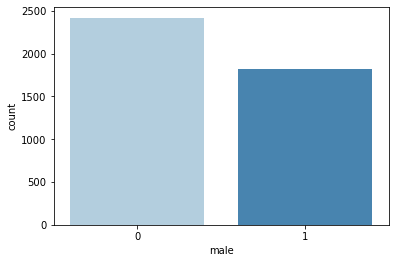

In [14]:
sns.countplot(x="male", data=new_data, palette="Blues")

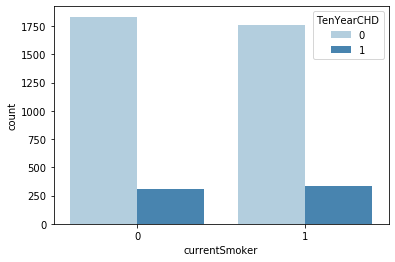

In [15]:
# sns.countplot(x="currentSmoker", data=new_data, palette="husl", hue="currentSmoker")
sns.countplot(x="currentSmoker", data=new_data, palette="Blues", hue="TenYearCHD")

In [16]:
# current smoker counts
data['currentSmoker'].value_counts()

0    2145
1    2095
Name: currentSmoker, dtype: int64

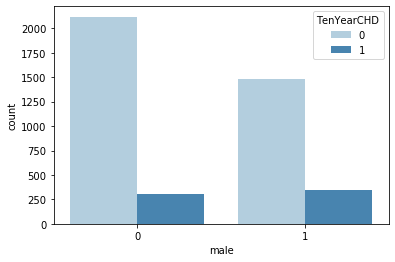

In [17]:
# gender and target variable counts
sns.countplot(x="male", data=new_data, palette="Blues", hue="TenYearCHD")

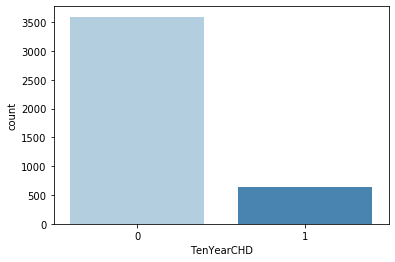

In [18]:
# target variable counts
sns.countplot(x="TenYearCHD", data=new_data, palette="Blues")

In [19]:
new_data["TenYearCHD"].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

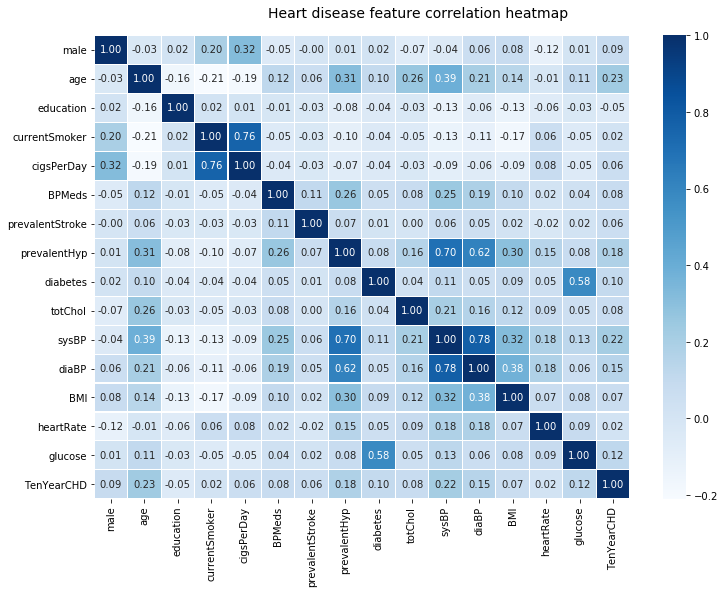

In [20]:
# Feature correlation matrix Heatmap
f, ax = plt.subplots(figsize=(12, 8))
corr = new_data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart disease feature correlation heatmap', fontsize=14)

In [21]:
# separating X and y variables
X = new_data.drop(['TenYearCHD'], axis=1)
y = new_data['TenYearCHD']

In [22]:
X.shape, y.shape

((4240, 15), (4240,))

In [23]:
X

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,107.0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0


In [24]:
y

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [25]:
# splitting the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [26]:
# nb classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = nb_classifier.predict(X_test)

In [28]:
# accuracy before balancing the dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8404088050314465


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1094
           1       0.38      0.21      0.27       178

    accuracy                           0.84      1272
   macro avg       0.63      0.58      0.59      1272
weighted avg       0.81      0.84      0.82      1272



In [30]:
# the confusion matrix shows that the model is biased because the dataset is not balanced,
# so we balance the dataset using SMOTE
print(confusion_matrix(y_test, y_pred))

[[1031   63]
 [ 140   38]]


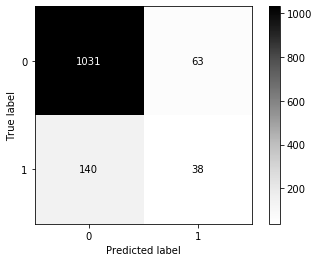

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nb_classifier, X_test, y_test, cmap="Greys")
plt.show()
# This cm shows that the model is highly biased to the negative class due to class imbalance, 
# so we have to balance the dataset to avoid overfitting.

In [32]:
# oversampling with SMOTE to avoid overfitting the model
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE(random_state=100)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [33]:
print("After oversampling, shape of train x: ", X_train_res.shape)
print("After oversampling, shape of train y: ", y_train_res.shape)

After oversampling, shape of train x:  (5004, 15)
After oversampling, shape of train y:  (5004,)


In [34]:
# fitting svm classifier after oversampling
nb_classifier.fit(X_train_res, y_train_res)

GaussianNB()

In [35]:
y_pred_res = nb_classifier.predict(X_test)

In [36]:
# model accuracy after class is balanced (accuracy reduces to 75%)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_res))
print("***************************************************")
print(classification_report(y_test, y_pred_res))

Accuracy: 0.7531446540880503
***************************************************
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1094
           1       0.25      0.37      0.30       178

    accuracy                           0.75      1272
   macro avg       0.57      0.59      0.57      1272
weighted avg       0.80      0.75      0.77      1272



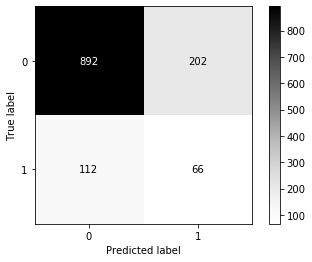

In [37]:
plot_confusion_matrix(nb_classifier, X_test, y_test, cmap=plt.cm.Greys)  # doctest: +SKIP
plt.show()

In [41]:
# feature selection with recursive feature selection with cross validation

In [43]:
rfe_cv = RFECV(estimator=nb_classifier, step=1, cv=10, scoring="accuracy")
rfe_cv = rfe_cv.fit(X_train_res, y_train_res)

RuntimeError: The classifier does not expose "coef_" or "feature_importances_" attributes

In [41]:
print("Optimal number of features: ", rfe_cv.n_features_)
print("Best features: ", X_train_res.columns[rfe_cv.support_])

AttributeError: 'RFECV' object has no attribute 'n_features_'

In [48]:
rfe_cv.grid_scores_

AttributeError: 'RFECV' object has no attribute 'grid_scores_'

In [372]:
rfe_cv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 2, 1, 5, 4, 3])

In [373]:
# confusion matrix
# plot_confusion_matrix(rfe_cv, X_test, y_test, cmap=plt.cm.Greys)  # doctest: +SKIP
# plt.show()

In [374]:
# new selected features 
new_selected_data = new_data[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'diaBP','TenYearCHD']]

In [375]:
new_selected_data.shape

(4240, 11)

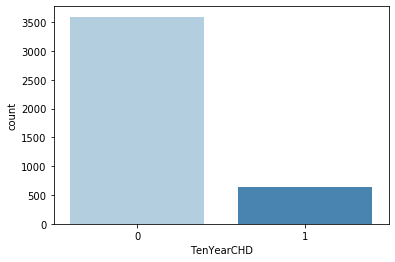

In [376]:
sns.countplot(x="TenYearCHD", data=new_selected_data, palette="Blues")

In [377]:
# separating X and y variables
X_new = new_selected_data.drop(['TenYearCHD'], axis=1)
y_new = new_selected_data['TenYearCHD']

In [378]:
X_new.shape, y_new.shape

((4240, 10), (4240,))

In [379]:
X_new

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,diaBP
0,1,39,4.0,0,0.0,0.0,0,0,0,70.0
1,0,46,2.0,0,0.0,0.0,0,0,0,81.0
2,1,48,1.0,1,20.0,0.0,0,0,0,80.0
3,0,61,3.0,1,30.0,0.0,0,1,0,95.0
4,0,46,3.0,1,23.0,0.0,0,0,0,84.0
...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.0,0,0,0,72.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,87.0
4237,0,52,2.0,0,0.0,0.0,0,0,0,83.0
4238,1,40,3.0,0,0.0,0.0,0,1,0,98.0


In [380]:
y_new

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [381]:
# First step of PCA for dimesionality reduction is standard normalization.
# (checking if features follow a gaussian distribution where mean=0, std=1),
scaler = StandardScaler()
scaler.fit(new_selected_data)

StandardScaler()

In [382]:
# all values are converted to same scale
scaled_new_data = scaler.transform(new_selected_data)

In [383]:
#PCA
from sklearn.decomposition import PCA

In [384]:
# n_components=2 means we convert number of features to 2
# If 0 < n_components < 1 and svd_solver == 'full', select the number of components 
# such that the amount of variance that needs to be explained is greater than the percentage specified by n_components.
# pca = PCA(n_components=6, svd_solver='full')
pca = PCA(n_components=2)

In [386]:
pca.fit(scaled_new_data)

PCA(n_components=2)

In [387]:
# transforming scaled data so that we reduce number of features
x_pca = pca.transform(scaled_new_data)

In [388]:
# dimensions of scaled data before PCA
scaled_new_data.shape

(4240, 11)

In [389]:
# reduced dimensions with PCA
x_pca.shape

(4240, 2)

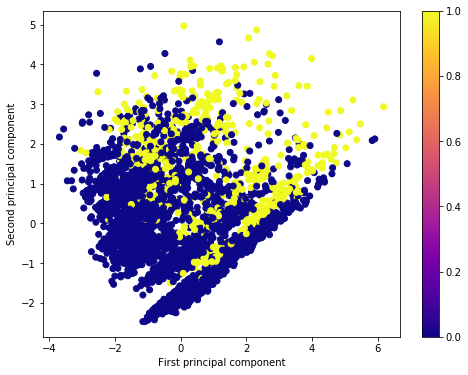

In [390]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=new_data["TenYearCHD"], cmap="plasma")

# plt.scatter(x_pca[:,0], x_pca[:,1],
#             c=new_data["TenYearCHD"], edgecolor='none', alpha=0.5,
#             cmap=plt.cm.get_cmap('plasma', 10))

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.colorbar()

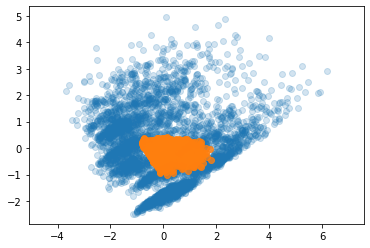

In [391]:
# new reduced dimensions vs initial data before dimension reduction
X_new = pca.inverse_transform(x_pca)
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 2], alpha=0.8)
plt.axis('equal');

In [392]:
X_new = x_pca
y_new = new_data["TenYearCHD"]

In [393]:
X_new.shape, y_new.shape

((4240, 2), (4240,))

In [394]:
X_new

array([[-1.07695839, -1.49768384],
       [ 0.16031794, -1.67249321],
       [-1.45291978,  0.95256416],
       ...,
       [ 0.50194827, -1.54542921],
       [ 0.98693567,  0.13136604],
       [-1.9348626 ,  0.53065967]])

In [395]:
y_new

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4240, dtype: int64

In [396]:
# separating the dataset into training and testing data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=100)

In [397]:
X_train_new.shape, y_train_new.shape

((2968, 2), (2968,))

In [398]:
# oversampling with SMOTE to avoid overfitting the model
from imblearn.over_sampling import SMOTE, ADASYN
sm_new_features = SMOTE(random_state=100)
X_train_res_new, y_train_res_new = sm.fit_sample(X_train_new, y_train_new.ravel())

In [399]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print("********************************************")

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("********************************************")

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 466
Before OverSampling, counts of label '0': 2502 

********************************************
After OverSampling, the shape of train_X: (5004, 15)
After OverSampling, the shape of train_y: (5004,) 

********************************************
After OverSampling, counts of label '1': 2502
After OverSampling, counts of label '0': 2502


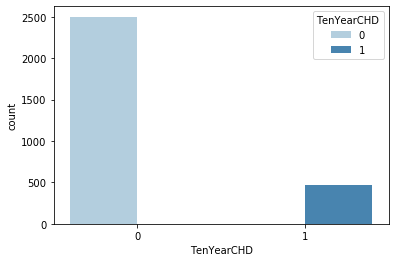

In [320]:
# plot showing number of samples for class 0 and 1 before oversampling in the newly selected dataset
# the model is biased to the negative class which contains more samples than the positive class
sns.countplot(x=y_train_new, data=new_selected_data, palette="Blues", hue=y_train_new)

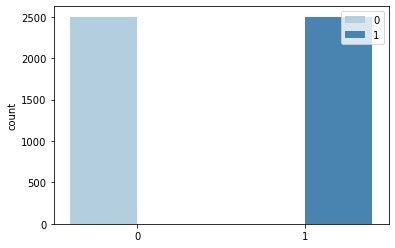

In [321]:
# plot showing numbe rof sample for the positive and negative class after oversampling with smote
sns.countplot(x=y_train_res_new, data=new_selected_data, palette="Blues", hue=y_train_res_new)

In [322]:
X_train_new.shape, X_train_res_new.shape, X_test_new.shape

((2968, 10), (5004, 10), (1272, 10))

In [323]:
# svm classifier after balancing the target classes
svm_clf.fit(X_train_res_new, y_train_res_new)

SVC(kernel='linear')

In [324]:
y_pred_new = svm_clf.predict(X_test_new)

In [326]:
# accurcay with 2 dimensions from PCA
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_new))

Accuracy: 1.0


In [327]:
print(classification_report(y_test_new, y_pred_new))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1094
           1       1.00      1.00      1.00       178

    accuracy                           1.00      1272
   macro avg       1.00      1.00      1.00      1272
weighted avg       1.00      1.00      1.00      1272



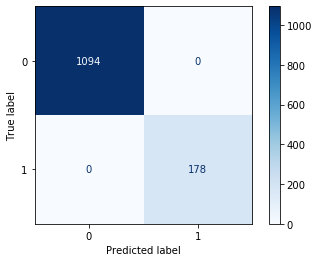

In [328]:
print(plot_confusion_matrix(svm_clf, X_test_new, y_test_new, cmap=plt.cm.Blues))

In [330]:
# finding the best number of components after oversampling with SMOTE
for component in range(1,11):
    pca = PCA(n_components=component)
    pca.fit(scaled_new_data)
    x_pca = pca.transform(scaled_new_data)
    X_new = x_pca
    y_new = new_selected_data["TenYearCHD"]
    X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=100)
    
    # fitting the training set with SMOTE
    X_train_res_new, y_train_res_new = sm_new_features.fit_sample(X_train_new, y_train_new.ravel())

    svm_clf = SVC(kernel="linear").fit(X_train_res_new, y_train_res_new)
    y_pred_new = svm_clf.predict(X_test_new)
    
    accuracy = metrics.accuracy_score(y_test_new, y_pred_new)
    print("Component:",component)
    print("Accuracy:",accuracy)
    print("********************")
    


Component: 1
Accuracy: 0.6918238993710691
********************
Component: 2
Accuracy: 0.7429245283018868
********************
Component: 3
Accuracy: 0.8805031446540881
********************
Component: 4
Accuracy: 0.8883647798742138
********************
Component: 5
Accuracy: 0.9787735849056604
********************
Component: 6
Accuracy: 0.9874213836477987
********************
Component: 7
Accuracy: 1.0
********************
Component: 8
Accuracy: 1.0
********************
Component: 9
Accuracy: 1.0
********************
Component: 10
Accuracy: 1.0
********************
